# **Transfer learning** with different sample sizes


In [9]:
import copy
import random
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os
import pickle
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.metrics import confusion_matrix

buf =30
"""
plot_confusion_matrix(): prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 200 samples 100 each

Confusion matrix, without normalization
[[95663498  9331476]
 [  349864  1714932]]


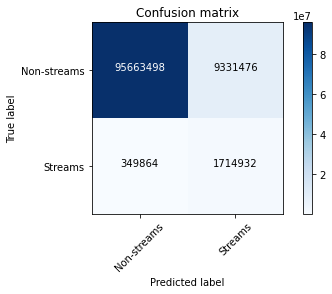

In [10]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_transfere-_learning_NAIP_100_samples_20201012-150904.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [11]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9518361268360532
F1 score of Stream: 0.26159794325524943
Precision of Nonstream: 0.9963560905199841
Precision of Stream: 0.1552479321784964
Recall of Nonstream: 0.9111245458282603
Recall of Stream: 0.8305575950360229


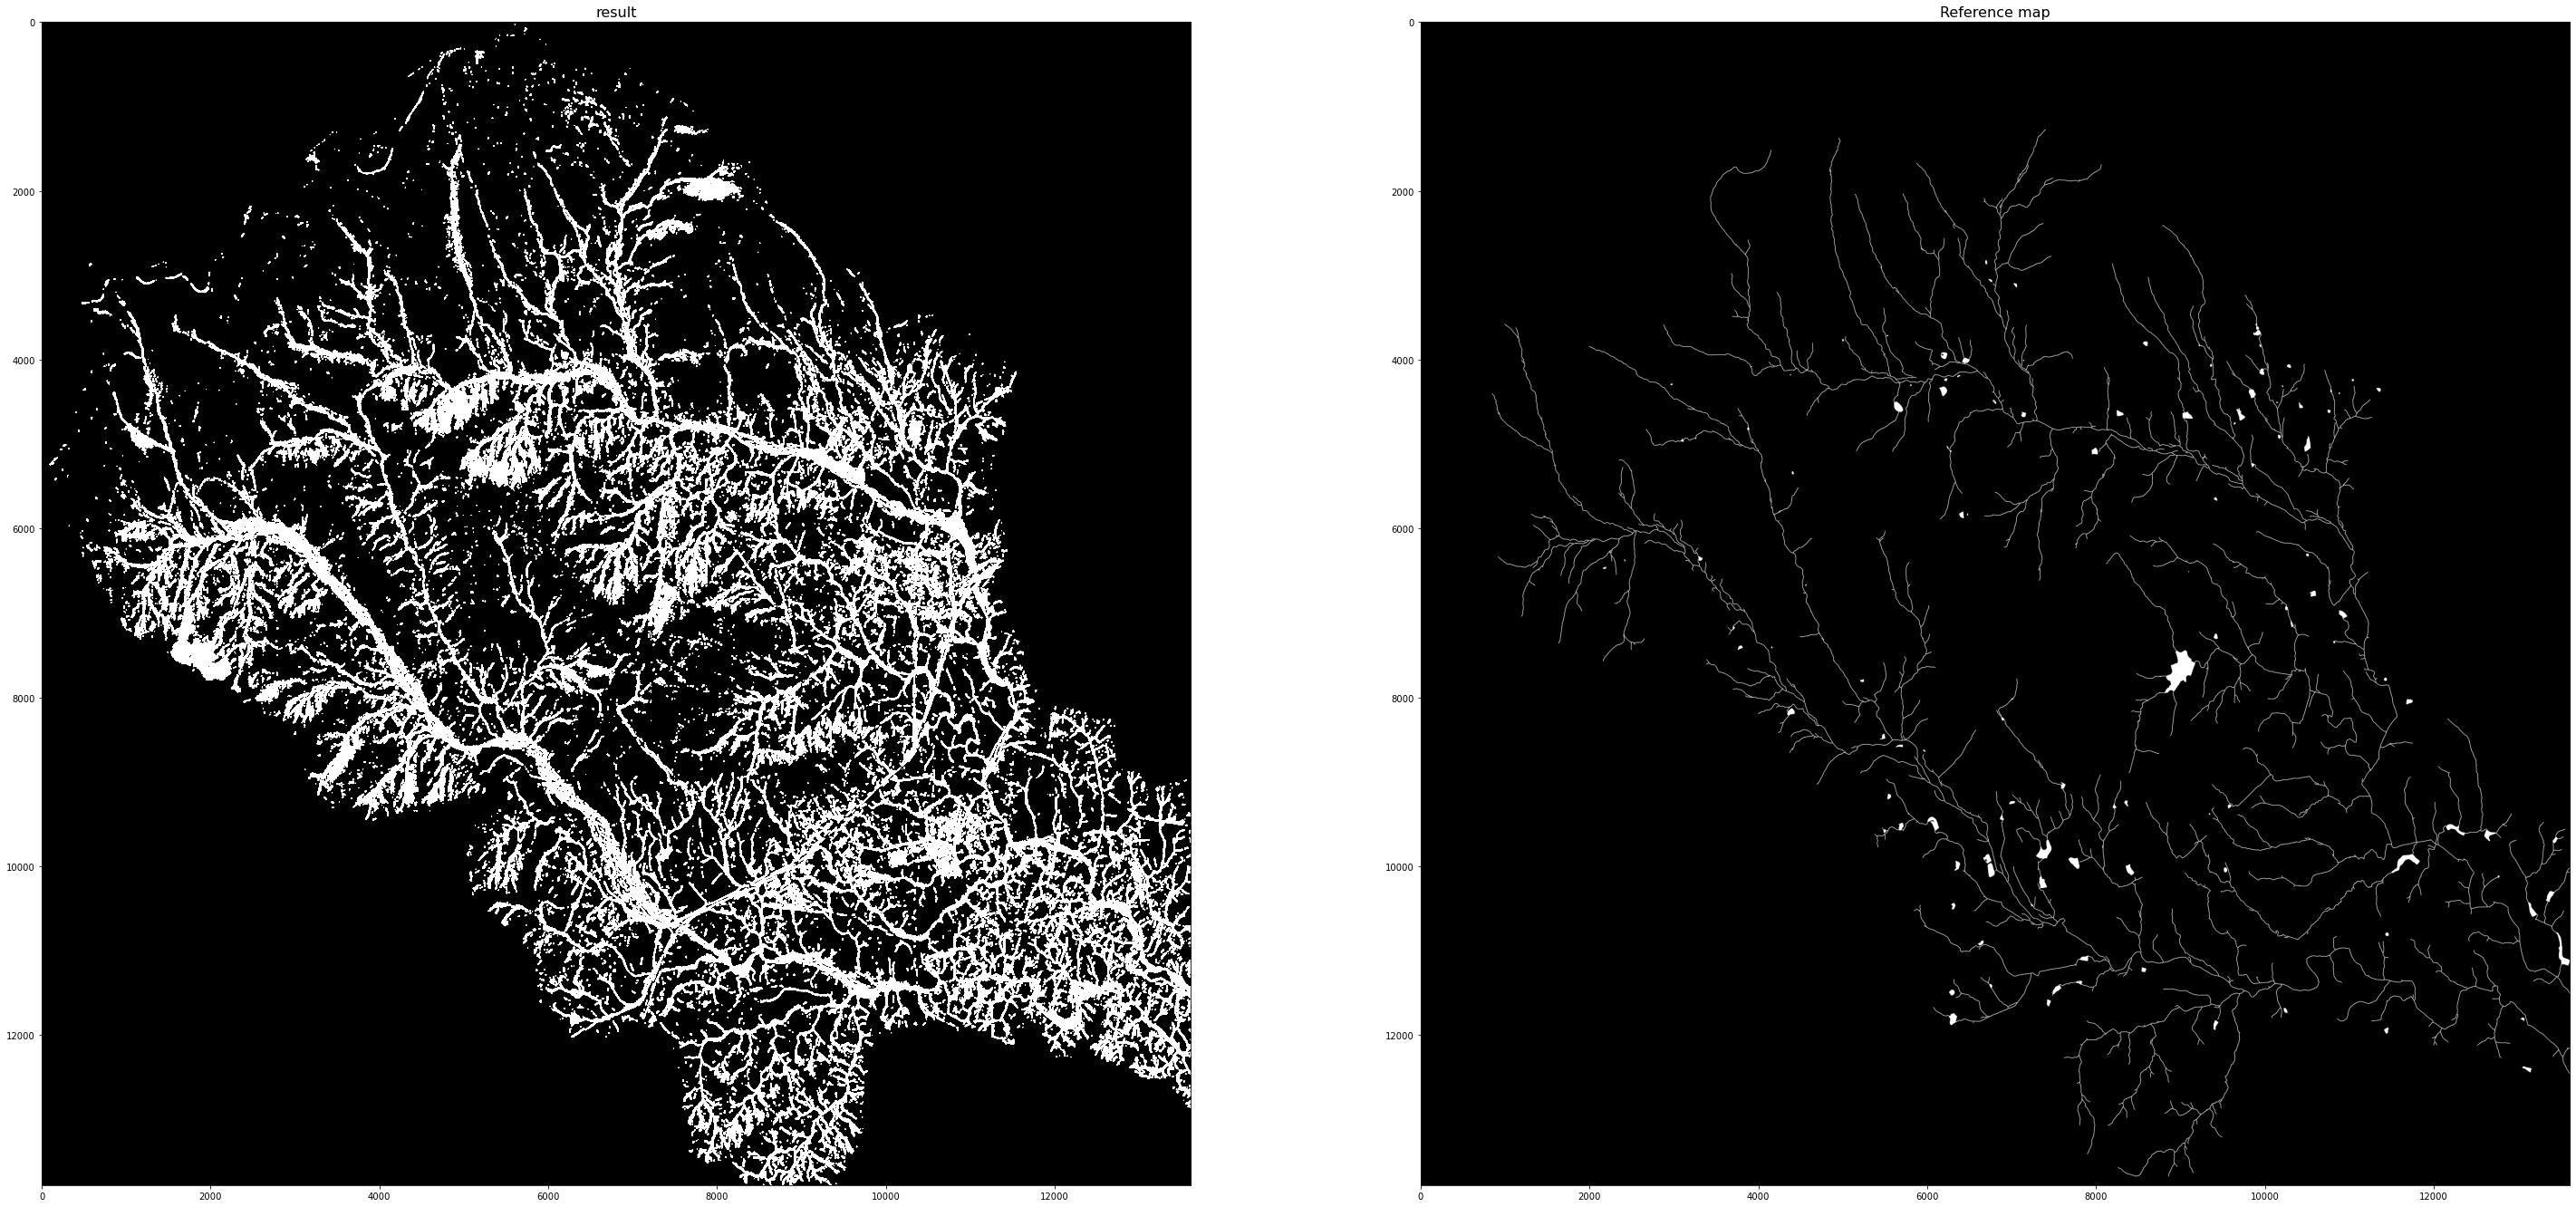

In [12]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()

----

## 700 samples 350 each

Confusion matrix, without normalization
[[99524161  5470813]
 [  473359  1591437]]


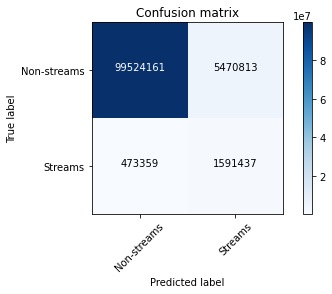

In [13]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_transfere-_learning_NAIP_350_samples_20201012-155935.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [14]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9710029773090131
F1 score of Stream: 0.3487299176535322
Precision of Nonstream: 0.9952662926040566
Precision of Stream: 0.22534418917483806
Recall of Nonstream: 0.9478945249322125
Recall of Stream: 0.7707478123746849


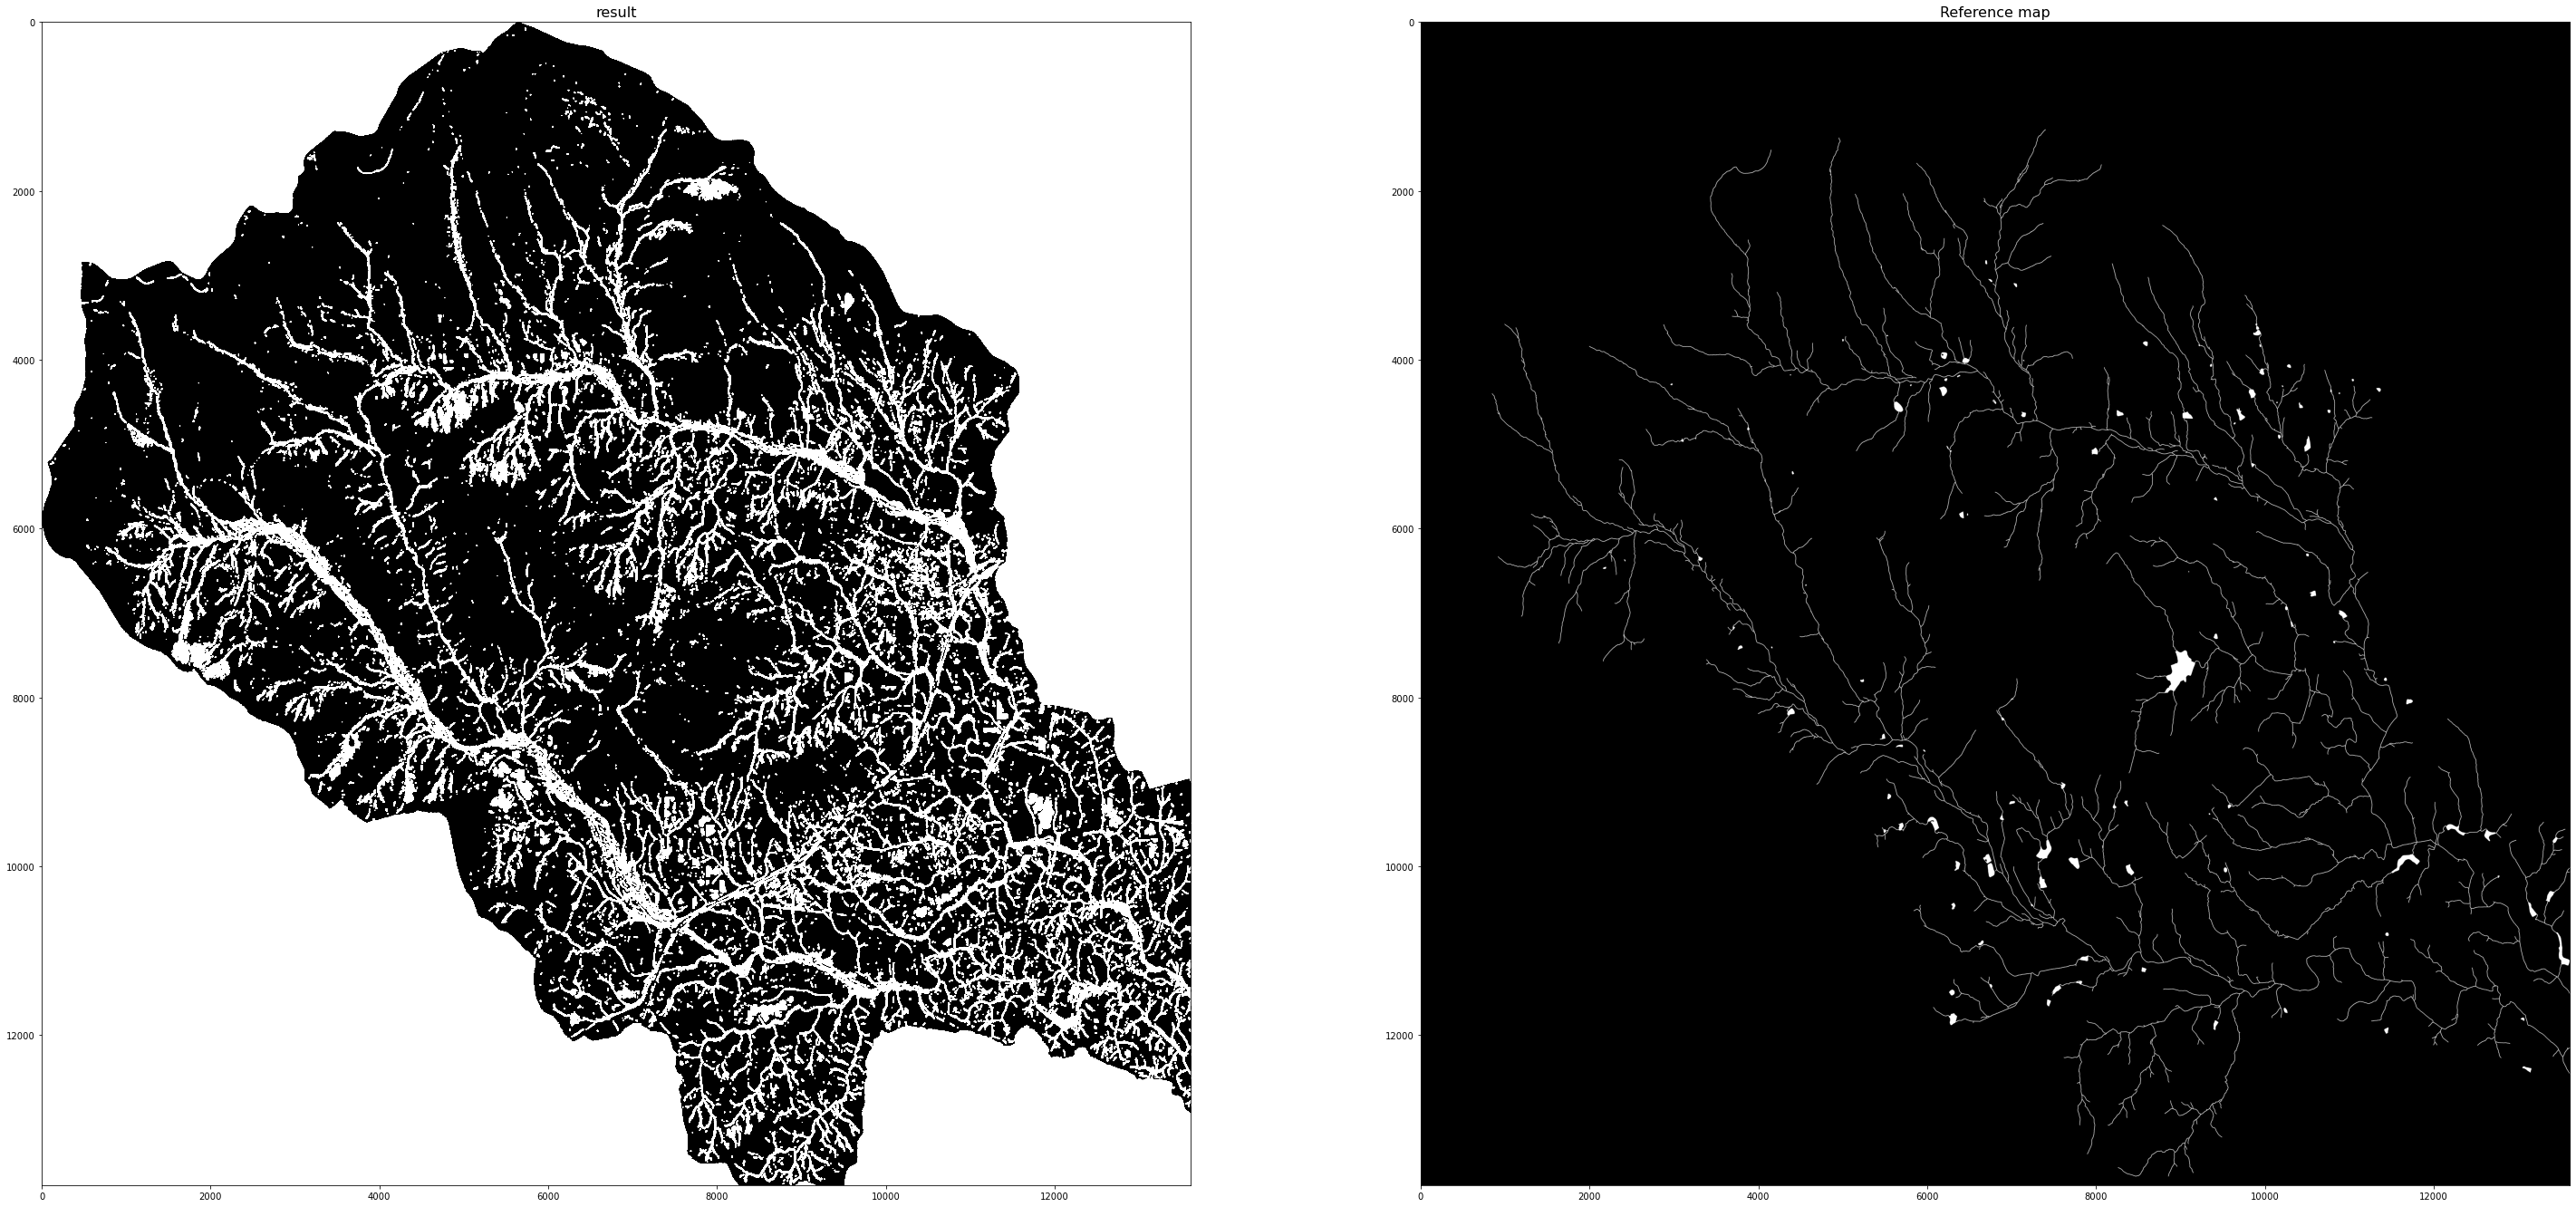

In [15]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()

---
## 1000 samples 500 each 

Confusion matrix, without normalization
[[100464895   4530079]
 [   546305   1518491]]


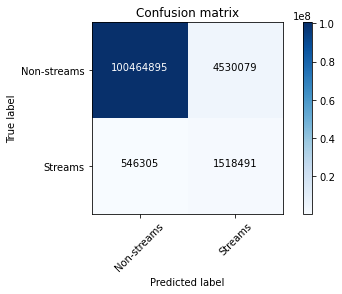

In [16]:
#prediction transfer modeltrained on 100 samples
preds_test_mod = np.load('prediction_results/prediction_result_model_transfere-_learning_NAIP_500_samples_20201012-170026.npy')

dim = np.load('Covington_data/Total_data/reference_nodata_as_0.npy').shape
numr = dim[0]//(224 - buf*2)
numc = dim[1]//(224 - buf*2)
count = -1
for i in range(numr):
    for j in range(numc):
        count += 1    
        if(j == 83):
            break
        temp = preds_test_mod[count][buf:-buf,buf:-buf]
        if j == 0:
            rows = temp
        else:
            rows = np.concatenate((rows,temp),axis = 1)
    if i == 0:
        prediction_map = copy.copy(rows)
    else:
        prediction_map = np.concatenate((prediction_map,rows),axis = 0)

prediction_map = prediction_map[:,:,0]

# mask
mask = np.load('Covington_data/Total_data/mask.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
[lr,lc] = np.where(mask == 1)

# Read reference data
groundtruthlist = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]][lr,lc]
predictionlist = prediction_map[lr,lc]

cm = confusion_matrix((groundtruthlist).astype(int), predictionlist)
plot_confusion_matrix(cm,classes=["Non-streams","Streams"])

In [17]:
# Statistics
from sklearn.metrics import f1_score, precision_score,recall_score

print('F1 score of Nonstream: '+str(f1_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('F1 score of Stream: '+str(f1_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Precision of Nonstream: '+str(precision_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Precision of Stream: '+str(precision_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

print('Recall of Nonstream: '+str(recall_score(groundtruthlist, predictionlist,labels=[0], average = 'micro')))
print('Recall of Stream: '+str(recall_score(groundtruthlist, predictionlist,labels=[1], average = 'micro')))

F1 score of Nonstream: 0.9753580977626427
F1 score of Stream: 0.3743183778471229
Precision of Nonstream: 0.9945916393429639
Precision of Stream: 0.251049586927158
Recall of Nonstream: 0.9568543252365584
Recall of Stream: 0.7354193828349145


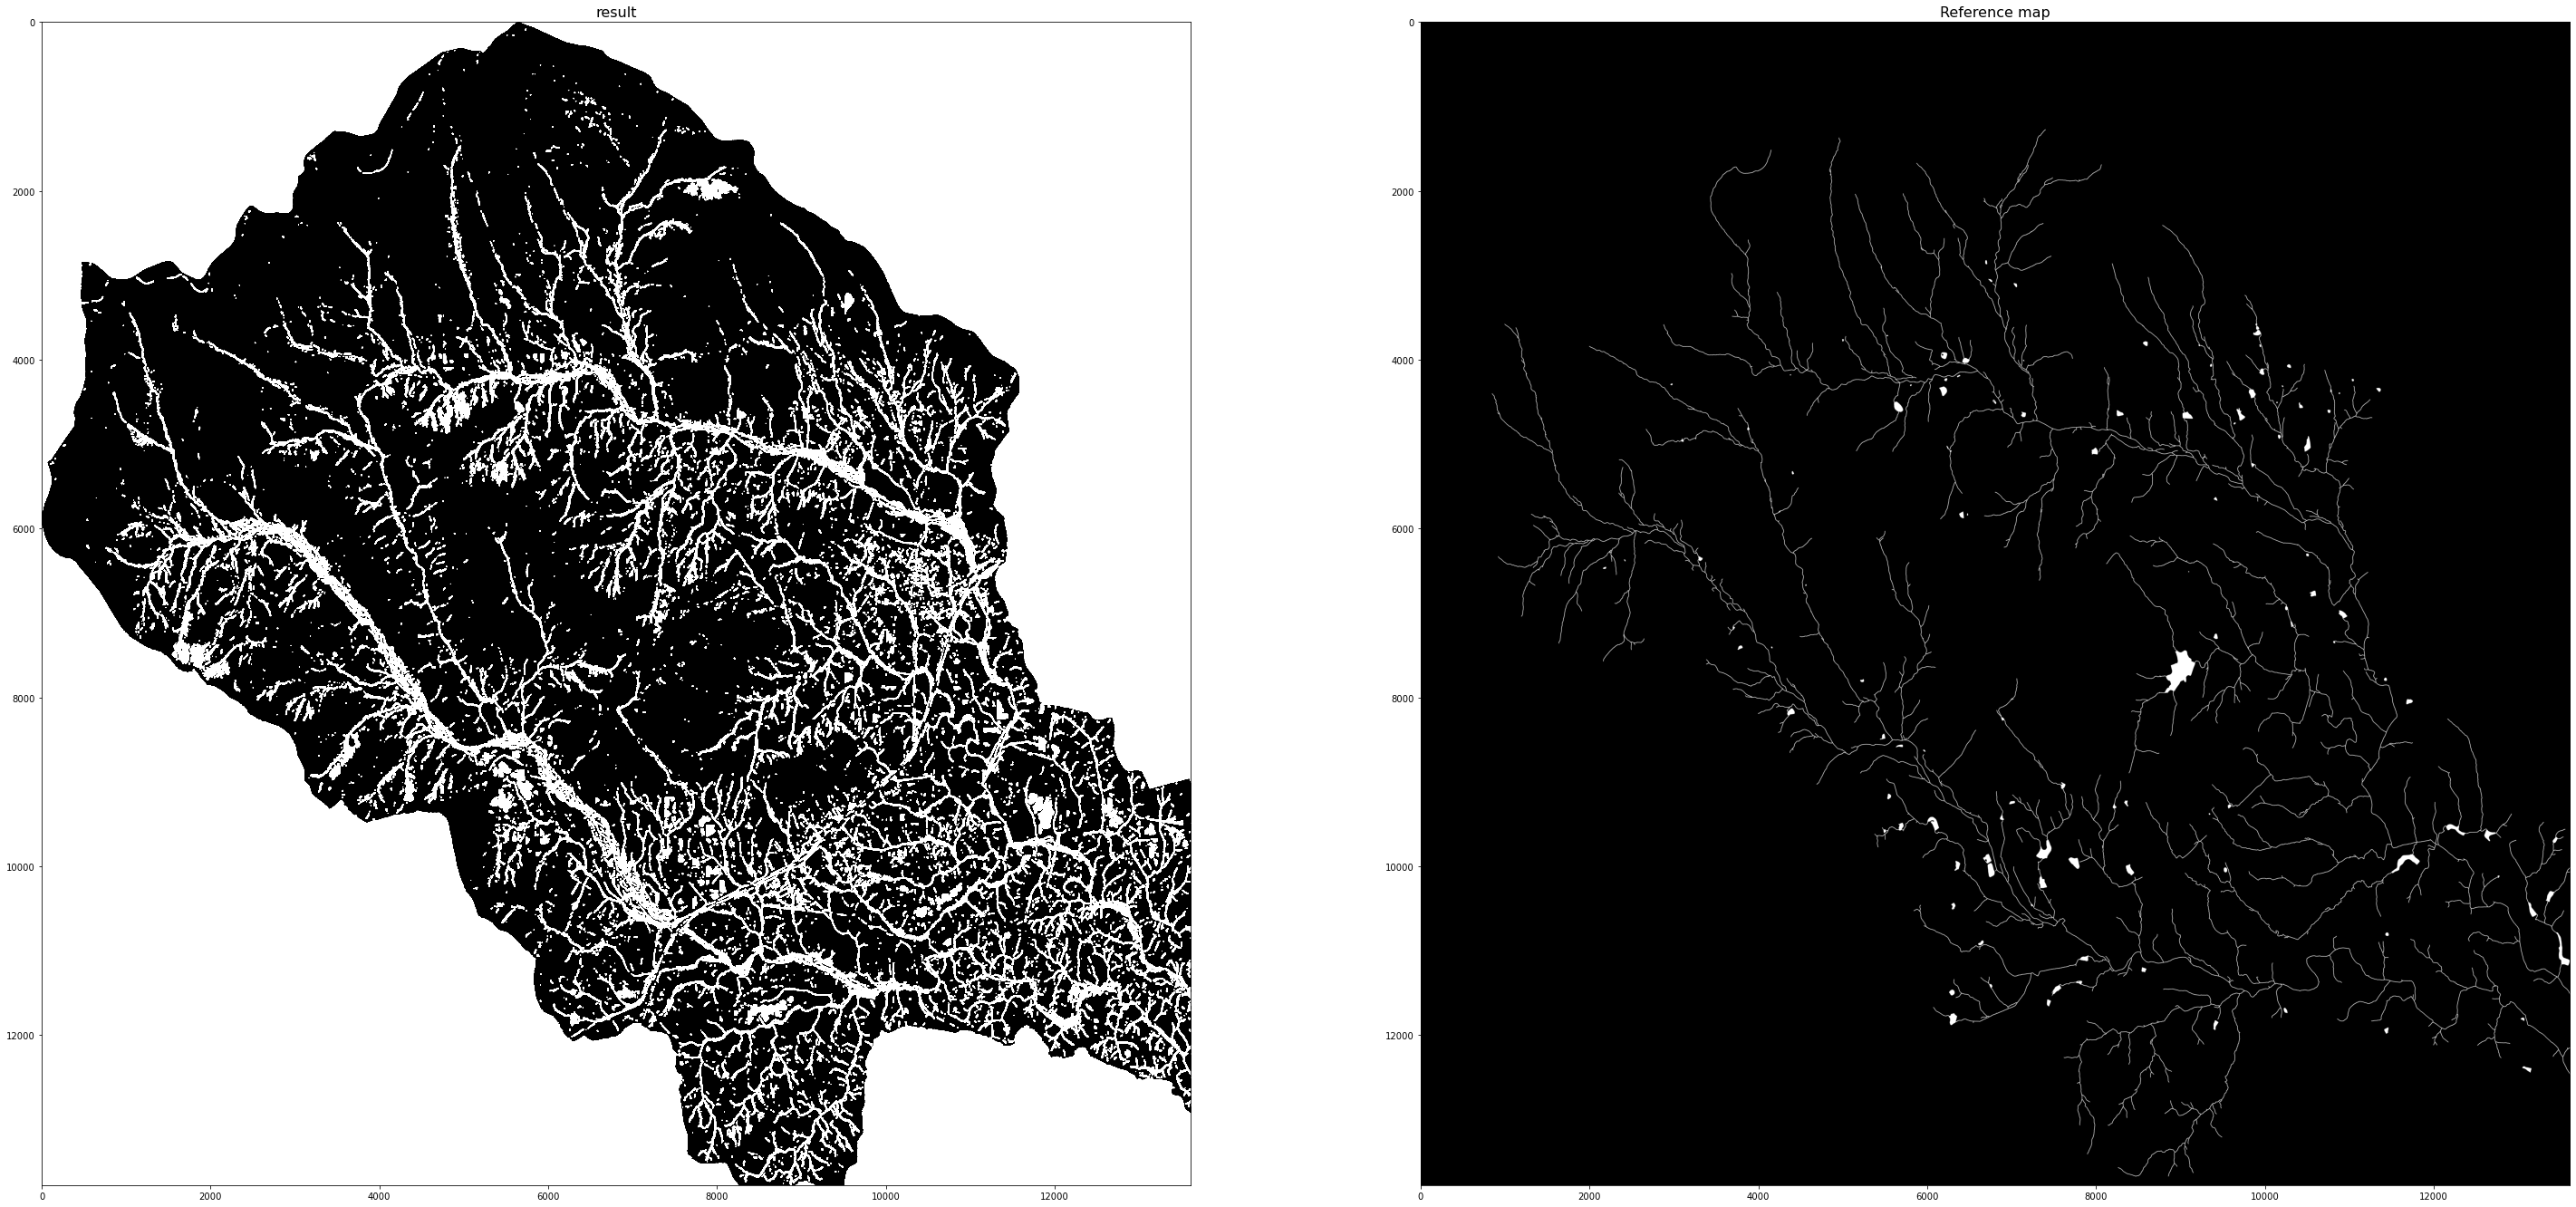

In [18]:
# Generate prediction map
import gdal    
import numpy as np
import numpy.ma as ma
import copy
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(50,50),dpi=72)

# Plot the map
prediction_map_plt = prediction_map
plt.subplot(1,2,1)
plt.title('result',fontsize = 16)
plt.imshow(prediction_map_plt*255,cmap='gray',vmin=0, vmax=1)

reference = np.load('Covington_data/Total_data/reference_nodata_as_0.npy')[:prediction_map.shape[0],:prediction_map.shape[1]]
plt.subplot(1,2,2)
plt.title('Reference map',fontsize = 16)
plt.imshow(reference*255,cmap='gray',vmin=0, vmax=255)
plt.show()